Reference:
- Horsburgh, J. S., A. S. Jones, S. S. Black, T. O. Hodson (2022). USGS dataretrieval Python Package Usage Examples, HydroShare, http://www.hydroshare.org/resource/c97c32ecf59b4dff90ef013030c54264

### Install the package

In [1]:
!pip install dataretrieval --quiet

In [2]:
from dataretrieval import nwis
from IPython.display import display
from matplotlib import ticker
import pandas as pd

### Create a list of the USGS gages within our study domain

In [19]:
# Bear River, Weber River, and Jordan-Provo River 
USGS_gages = ['10126000', '10141000', '10168000']

# unit conversion parameter
cfs_2_cms = 0.028316846592

### TEST: Get all of the annual mean discharge data for a single site

In [12]:
# Set the parameters needed to retrieve data
siteNumber = "10126000"
parameterCode = "00060" # Discharge

# Retrieve the statistics
x1 = nwis.get_stats(sites=siteNumber, parameterCd=parameterCode, statReportType="annual")
print("Retrieved " + str(len(x1[0])) + " data values.")

Retrieved 66 data values.


Text(0, 0.5, 'Annual mean discharge (cfs)')

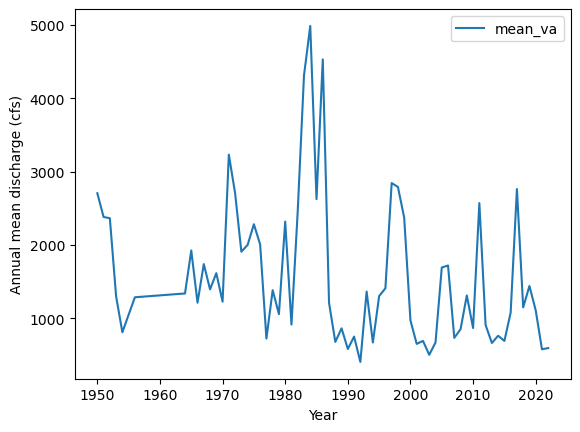

In [14]:
ax = x1[0].plot(x='year_nu', y='mean_va')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.set_xlabel('Year')
ax.set_ylabel('Annual mean discharge (cfs)')

### TEST: Get the daily mean discharge data for a single site

In [26]:
# Set the parameters needed to retrieve data
siteNumber = "10126000" 
parameterCode = "00060"  # Discharge
startDate = "2015-10-01"
endDate = "2019-10-01"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")

Retrieved 1462 data values.


In [27]:
# Display the data frame as a table
display(dailyStreamflow[0])

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2015-10-01 00:00:00+00:00,226.0,A,10126000
2015-10-02 00:00:00+00:00,269.0,A,10126000
2015-10-03 00:00:00+00:00,338.0,A,10126000
2015-10-04 00:00:00+00:00,308.0,A,10126000
2015-10-05 00:00:00+00:00,458.0,A,10126000
...,...,...,...
2019-09-27 00:00:00+00:00,672.0,A,10126000
2019-09-28 00:00:00+00:00,706.0,A,10126000
2019-09-29 00:00:00+00:00,1310.0,A,10126000


In [17]:
dailyStreamflow[0].describe()

,00060_Mean
count,1462.000000
mean,1565.189261
std,1473.811169
min,96.200000
25%,525.000000
50%,1070.000000
75%,2167.500000
max,9390.000000


In [30]:
dailyStreamflow[0]['00060_Mean cms']=dailyStreamflow[0]['00060_Mean']*cfs_2_cms

Text(0, 0.5, 'Streamflow (cms)')

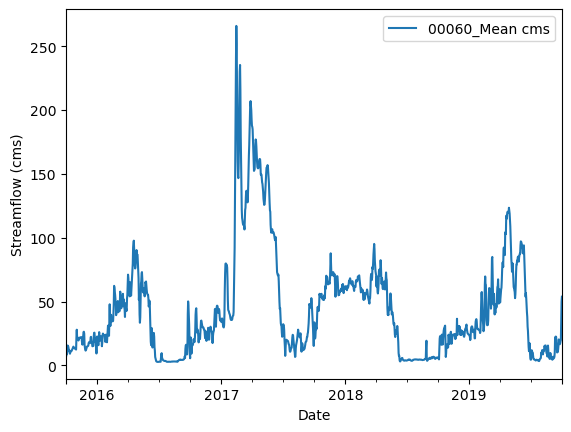

In [31]:
ax = dailyStreamflow[0].plot(y='00060_Mean cms')
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cms)')

# Get the daily mean discharge data for all three sites

In [38]:
# Set the parameters needed to retrieve data
parameterCode = "00060"  # Discharge
startDate = "2015-10-01"
endDate = "2019-10-01"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=USGS_gages, parameterCd=parameterCode, start=startDate, end=endDate) 
dailyStreamflow[0]

00060_Mean 00060_Mean_cd
site_no  datetime                                           
10126000 2015-10-01 00:00:00+00:00       226.0             A
         2015-10-02 00:00:00+00:00       269.0             A
         2015-10-03 00:00:00+00:00       338.0             A
         2015-10-04 00:00:00+00:00       308.0             A
         2015-10-05 00:00:00+00:00       458.0             A
...                                        ...           ...
10168000 2019-09-27 00:00:00+00:00        17.6             A
         2019-09-28 00:00:00+00:00        12.9             A
         2019-09-29 00:00:00+00:00        39.4             A
         2019-09-30 00:00:00+00:00        22.1             A
         2019-10-01 00:00:00+00:00        13.9             A

[4386 rows x 2 columns]

In [41]:
dailyStreamflow_bear = dailyStreamflow[0].loc[USGS_gages[0]]
dailyStreamflow_weber = dailyStreamflow[0].loc[USGS_gages[1]]
dailyStreamflow_jordan = dailyStreamflow[0].loc[USGS_gages[2]]

In [45]:
dailyStreamflow_bear['00060_Mean cms']=dailyStreamflow_bear['00060_Mean']*cfs_2_cms
dailyStreamflow_weber['00060_Mean cms']=dailyStreamflow_weber['00060_Mean']*cfs_2_cms
dailyStreamflow_jordan['00060_Mean cms']=dailyStreamflow_jordan['00060_Mean']*cfs_2_cms

/tmp/ipykernel_1186/1680547198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyStreamflow_bear['00060_Mean cms']=dailyStreamflow_bear['00060_Mean']*cfs_2_cms
/tmp/ipykernel_1186/1680547198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyStreamflow_weber['00060_Mean cms']=dailyStreamflow_weber['00060_Mean']*cfs_2_cms
/tmp/ipykernel_1186/1680547198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Text(0, 0.5, 'Streamflow (cms)')

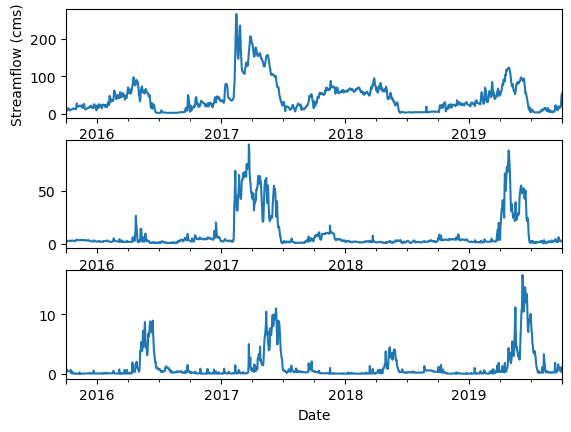

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1)

dailyStreamflow_bear['00060_Mean cms'].plot(ax=axes[0])
dailyStreamflow_weber['00060_Mean cms'].plot(ax=axes[1])
dailyStreamflow_jordan['00060_Mean cms'].plot(ax=axes[2])

axes[2].set_xlabel('Date')
axes[0].set_ylabel('Streamflow (cms)')

Save

In [ ]:
!mkdir usgs_outputs

In [ ]:
dailyStreamflow_bear.to_csv('./usgs_outputs/obs_q_bear.csv')
dailyStreamflow_weber.to_csv('./usgs_outputs/obs_q_weber.csv')
dailyStreamflow_jordan.to_csv('./usgs_outputs/obs_q_jordan.csv')